<a href="https://colab.research.google.com/github/sulemantech/12v12/blob/master/ArabicAlphabetRecognizerCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Importer la bibliothèque "drive" de Google Colab
from google.colab import drive

# Monter le lecteur Google Drive sur le système de fichiers de Colab
drive.mount('/content/drive')

# Une fois que la commande ci-dessus est exécutée, un lien est généré
# permettant d'accéder au compte Google Drive. Ce lien doit être suivi,
# une autorisation doit être accordée et le code de vérification doit être copié.
# Ce code de vérification doit ensuite être collé dans la zone de saisie qui apparaît
# dans la sortie de la commande ci-dessus. Cela permet de monter le lecteur Google Drive
# sur le système de fichiers de Colab, en créant un lien symbolique vers le dossier "My Drive"
# du compte Google Drive de l'utilisateur.

# Le chemin d'accès "/content/drive" peut maintenant être utilisé pour accéder
# aux fichiers du lecteur Google Drive monté.


Mounted at /content/drive


In [19]:
# Importer la bibliothèque "pandas" pour lire les fichiers CSV contenant les données
import pandas as pd

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [20]:

arabic_characters = ['alif', 'bae', 'tae', 'thae', 'jim', 'hae', 'khaa', 'dal', 'dhal',
                    'rae', 'zain', 'sin', 'chin', 'sad', 'dad', 'tae', 'zain', 'aain',
                    'ghain', 'fae', 'qaf', 'kaf', 'lam', 'mim', 'noun', 'hae', 'waw', 'yae']
# arabic_characters= list('ابتثجحخدذرزسشصضطظعغفقكلمنهوي')
len(arabic_characters)


28

In [21]:
import pandas as pd

# Charger les données d'entraînement à partir d'un fichier CSV dans un dataframe Pandas
x_train = pd.read_csv("https://raw.githubusercontent.com/Bilal-Belli/ArabicAlphabetRecognizerCNN/refs/heads/main/Datasets/csvTrainImages%2013440x1024.csv",header=None)

# Charger les données de test à partir d'un fichier CSV dans un dataframe Pandas
x_test = pd.read_csv("https://raw.githubusercontent.com/Bilal-Belli/ArabicAlphabetRecognizerCNN/refs/heads/main/Datasets/csvTestImages%203360x1024.csv",header=None)

# Charger les étiquettes d'entraînement à partir d'un fichier CSV dans un dataframe Pandas
y_train = pd.read_csv("https://raw.githubusercontent.com/Bilal-Belli/ArabicAlphabetRecognizerCNN/refs/heads/main/Datasets/csvTrainLabel%2013440x1.csv",header=None)

# Charger les étiquettes de test à partir d'un fichier CSV dans un dataframe Pandas
y_test = pd.read_csv("https://raw.githubusercontent.com/Bilal-Belli/ArabicAlphabetRecognizerCNN/refs/heads/main/Datasets/csvTestLabel%203360x1.csv",header=None)

# "header=None" signifie que le fichier CSV n'a pas de ligne d'en-tête

In [22]:
# Content display
x_train.head()
x_test.head()
y_train.head()
y_test.head()

,0
0,1
1,1
2,2
3,2
4,3


In [23]:
# Check if there are any missing values in the x_train dataframe
# The isnull() method returns a boolean dataframe indicating whether each element is null (True) or not (False)
# The sum() method returns the number of null values for each column
# The result is a dataframe with the same shape as x_train, where each column contains the count of null values in that column
x_train.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
1019,0
1020,0
1021,0
1022,0


In [24]:
# Calculate the total number of missing values in the x_train dataframe
# The sum() method returns the sum of all the values in the dataframe
x_train.isnull().sum().sum()


np.int64(0)

In [25]:
# Check if there are any missing values in the x_test dataframe
# The isnull() method returns a boolean dataframe indicating whether each element is null (True) or not (False)
# The sum() method returns the number of null values for each column
# The result is a dataframe with the same shape as x_test, where each column contains the count of null values in that column
x_test.isnull().sum()


,0
0,0
1,0
2,0
3,0
4,0
...,...
1019,0
1020,0
1021,0
1022,0


In [26]:
# Calculate the total number of missing values in the x_test dataframe
# The sum() method returns the sum of all the values in the dataframe
x_test.isnull().sum().sum()


np.int64(0)

In [27]:
# Calculate the total number of missing values in the x_test dataframe
# The sum() method returns the sum of all the values in the dataframe
x_test.isnull().sum().sum()

np.int64(0)

In [28]:
# Convert the dataframes x_train, x_test, y_train, and y_test into NumPy arrays for use in the deep learning model
# The to_numpy() method returns a NumPy array containing the same data as the dataframe
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()


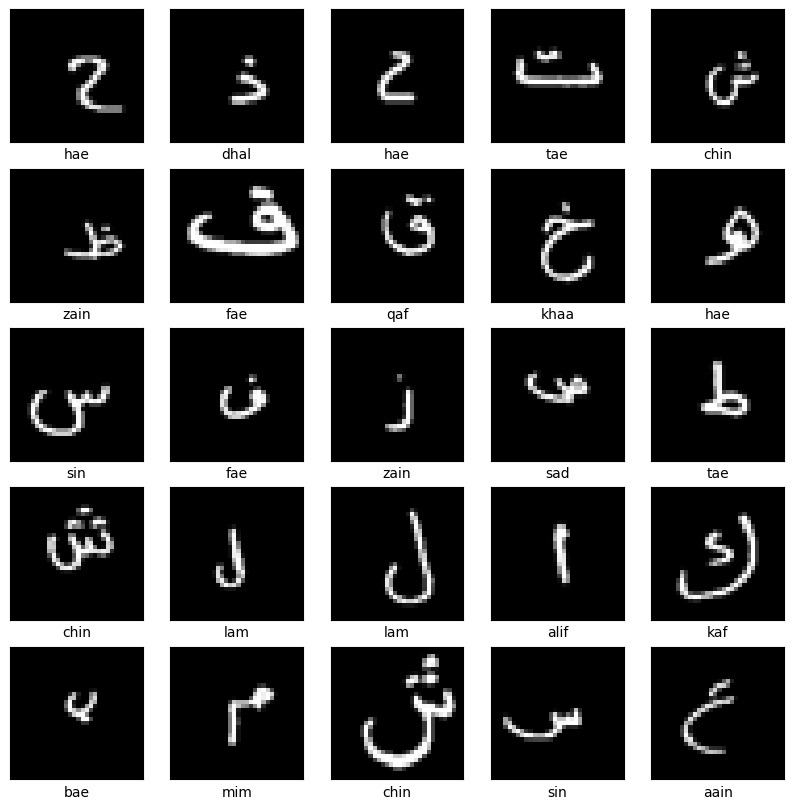

In [29]:
# Display the shape of the training data
# print(x_train.shape)

# Display the shape of the training output data
# print(y_train.shape)

# Display the shape of the test input data
# print(x_test.shape)

# Display the shape of the test output data
# print(y_test.shape)

# Normalize the data
x_train = x_train / 255
x_test = x_test / 255

# Reshape the data
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

# Display several example images
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])-1])
plt.show()


In [30]:
# One-hot encoding of the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Check the dimensions
x_train.shape
y_train.shape

# Display an example of an encoded label
y_train[0]

# Number of classes
len(y_train[0])

# Remove the first column of encoding
y_train = y_train[:,1:]
y_test = y_test[:,1:]

# Check the dimensions after removal
len(y_train[0])


28

In [31]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, Flatten, Dropout, MaxPooling2D

model = Sequential()

# Add layers to the model
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(28, activation='softmax'))

# Compile the model by defining the optimization parameters and metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=10)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.2329 - loss: 2.6139
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.6283 - loss: 1.1869
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.7371 - loss: 0.8309
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.7879 - loss: 0.6648
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - accuracy: 0.8239 - loss: 0.5504
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 19s 43ms/step - accuracy: 0.8374 - loss: 0.4945
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8569 - loss: 0.4505
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 22s 48ms/step - accuracy: 0.8618 - loss: 0.4163
Epoch 9/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.8781 - loss: 0.3725
Epoch 10/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 23s 48ms/step - accuracy: 0.8853 - loss: 0.3436


In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │        32,284 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,166 (602.21 KB)

 Trainable params: 51,388 (200.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 102,778 (401.48 KB)

In [33]:
model.evaluate(x_test,y_test)

105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9107 - loss: 0.3214


[0.30670586228370667, 0.9154762029647827]

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [35]:
epochs = 100
batch_size = 32

# Build a training image generator for data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # Do not set the mean of the dataset to 0
    samplewise_center=False,   # Do not set the mean of each sample to 0
    featurewise_std_normalization=False,  # Do not divide inputs by dataset std
    samplewise_std_normalization=False,   # Do not divide each input by its std
    zca_whitening=False,       # Do not apply ZCA whitening
    rotation_range=10,         # Randomly rotate images within a range (degrees)
    zoom_range=0.1,            # Random zoom on images
    width_shift_range=0.1,     # Random horizontal shift (fraction of total width)
    height_shift_range=0.1,    # Random vertical shift (fraction of total height)
    horizontal_flip=False,     # Do not randomly flip images horizontally
    vertical_flip=False        # Do not randomly flip images vertically
)


In [36]:
train_gen = datagen.flow(x_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(x_test, y_test, batch_size=batch_size)

In [37]:
history = model.fit(train_gen, epochs=epochs,
                             steps_per_epoch=x_train.shape[0]//batch_size,
                             validation_data=test_gen,
                             validation_steps=x_test.shape[0]//batch_size)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


420/420 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.7435 - loss: 0.8550 - val_accuracy: 0.8438 - val_loss: 0.5559
Epoch 2/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 64ms/step - accuracy: 0.7727 - loss: 0.7417 - val_accuracy: 0.8545 - val_loss: 0.4965
Epoch 3/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 27s 64ms/step - accuracy: 0.8037 - loss: 0.6517 - val_accuracy: 0.8601 - val_loss: 0.4911
Epoch 4/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 26s 62ms/step - accuracy: 0.8052 - loss: 0.6310 - val_accuracy: 0.8667 - val_loss: 0.4693
Epoch 5/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 42s 65ms/step - accuracy: 0.8124 - loss: 0.6074 - val_accuracy: 0.8699 - val_loss: 0.4559
Epoch 6/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 64ms/step - accuracy: 0.8217 - loss: 0.5740 - val_accuracy: 0.8863 - val_loss: 0.4063
Epoch 7/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.8291 - loss: 0.5464 - val_accuracy: 0.8854 - val_loss: 0.4015
Epoch 8/100
420/420 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.8315 - loss: 0.5474 - val_

In [1]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


Text(95.72222222222221, 0.5, 'Truth')

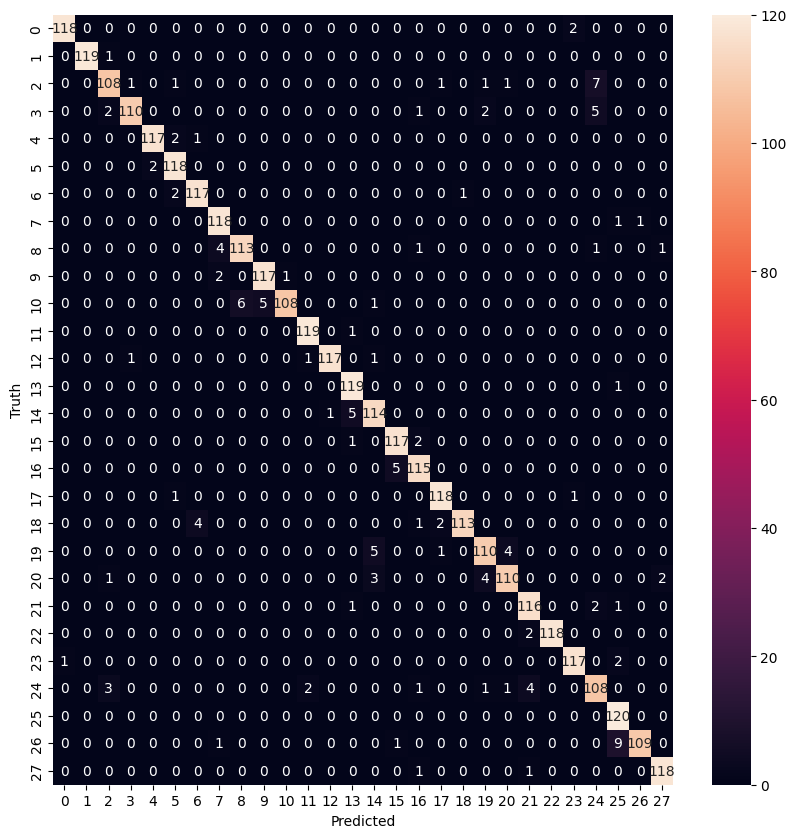

In [38]:
# Predict values from the validation set
y_preds = model.predict(x_test)

# Convert the prediction classes into one-hot vectors
y_pred_classes = np.argmax(y_preds, axis=1)

# Convert the validation observations into one-hot vectors
y_true = np.argmax(y_test, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


**Handwriting recognition with openCV2**

In [39]:
import argparse
import imutils
from imutils.contours import sort_contours
import cv2 as cv
from keras.models import load_model



In [40]:
model.save("modelcharacters.h5")

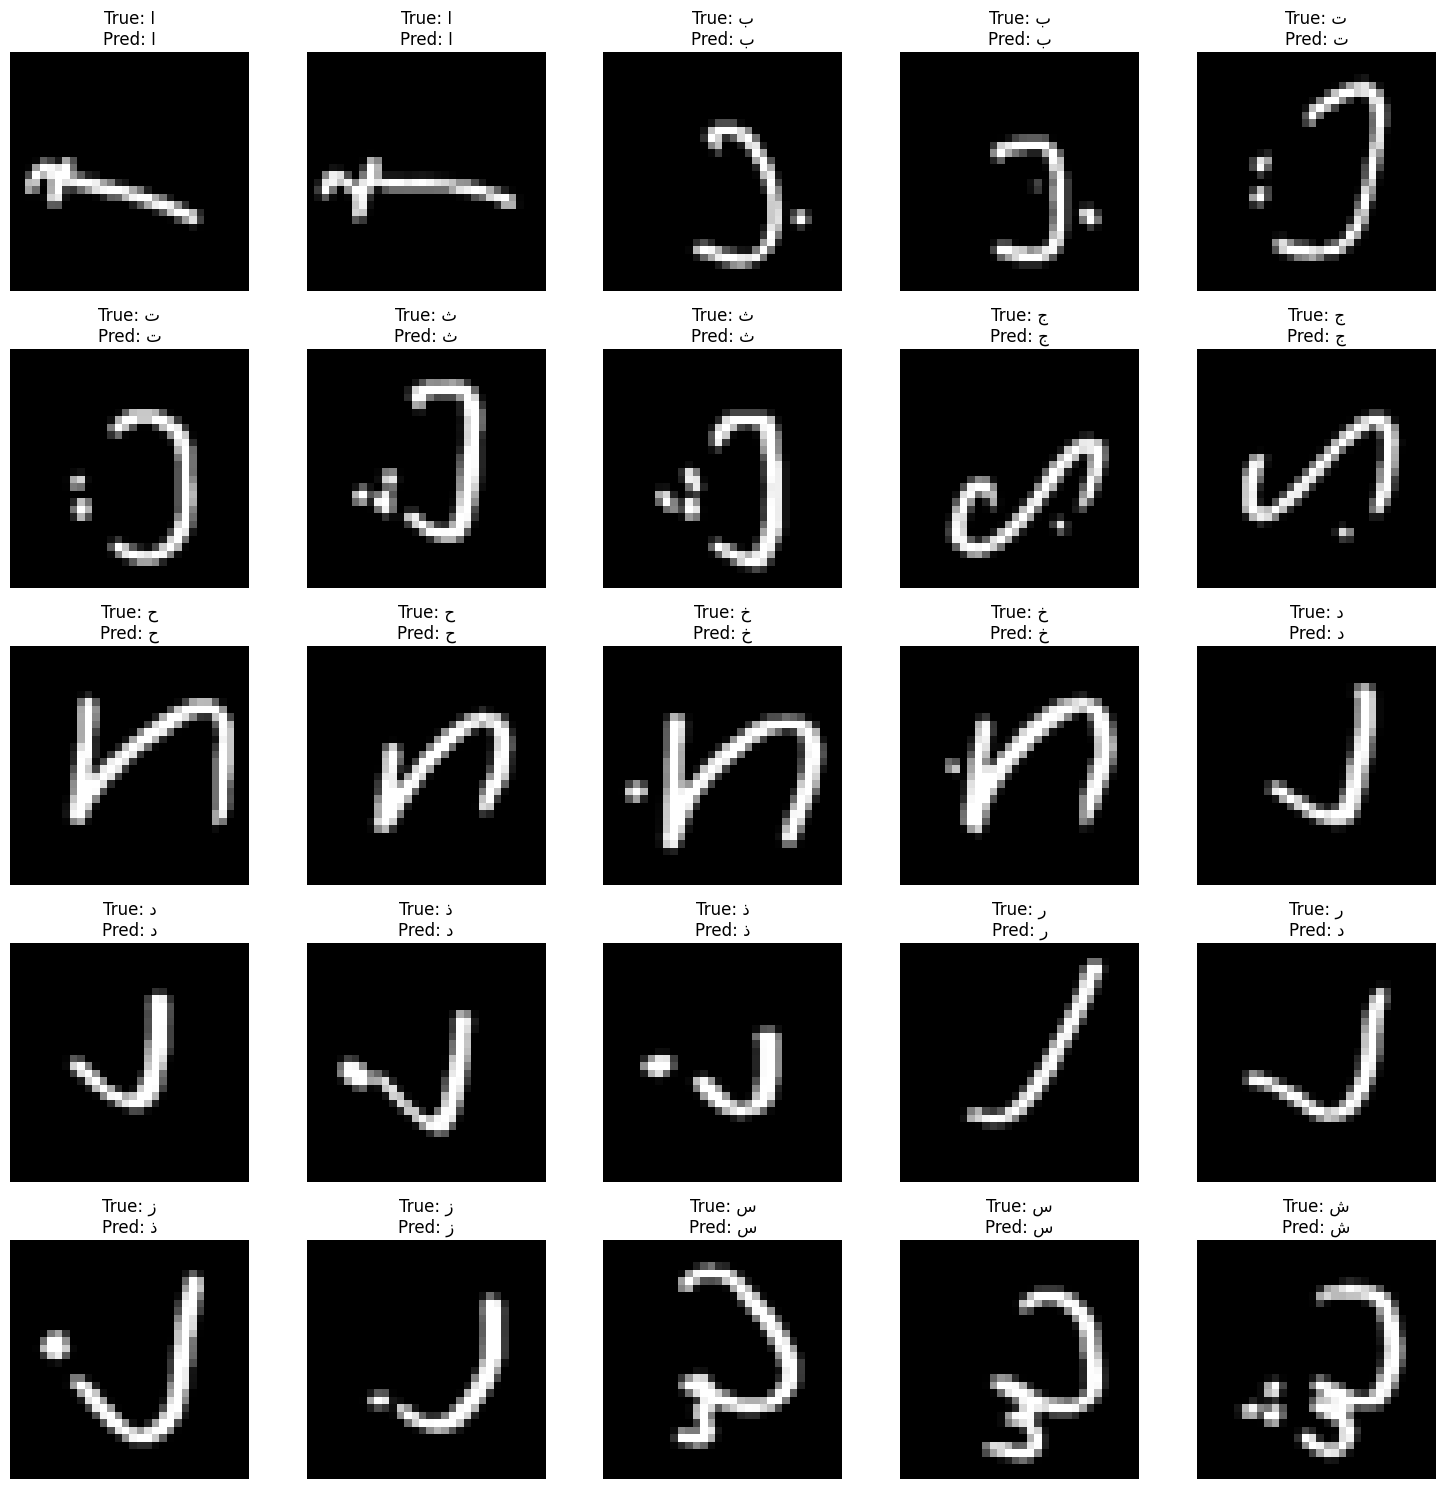

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Number of images to display
num_images = 25
plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(5, 5, i + 1)

    # Reshape to 32x32 since input size is 1024
    image = x_test[i].reshape(32, 32)

    # Get true and predicted labels
    true_label = class_labels[y_true[i]]
    predicted_label = class_labels[y_pred_classes[i]]

    # Display image with labels
    plt.imshow(image, cmap='gray')
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()

